In [1]:
#USING A CUSTOM LIBRARY
include("ODE.jl")
using .ODE, Plots, Statistics

## PC-Exercise 8.1.1

In [2]:
#PC-Exercise 8.1.1
x8_1_1(t) = exp(-5t);
a8_1_1(x,t) = -5x;

In [3]:
nb8_1_1_a = FundamentalNumericalBase(a8_1_1,2^-3);
nb8_1_1_b = FundamentalNumericalBase(a8_1_1,2^-5);

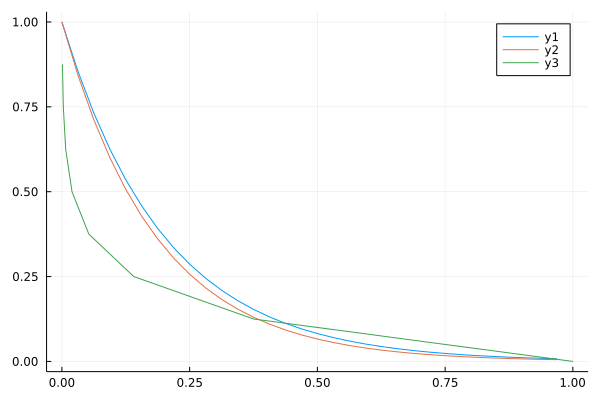

In [4]:
p = plot(0.0:nb8_1_1_b.Δt:0.99, [[x8_1_1(t) for t=0.0:nb8_1_1_b.Δt:0.99],euler_method(nb8_1_1_b, 1.0,0.0,1.0)])
plot!(p,euler_method(nb8_1_1_a, 1.0,0.0,1.0),0.0:nb8_1_1_a.Δt:0.99)

## PC-Exercise 8.1.2
For the IVP in PC-Exercise 8.1.1, calculate the global discretization error at time $t=1$ for the euler method with time steps of equal length $\Delta = 2^{-n}, n\in \{0,1,\dots,13\}$, rounding off to 5 digits. Plot the $\log_2$ of the errorsm against $\log_2 \Delta$ and determine the slope of the resulting curve.|

In [5]:
#8_1_2: make a list of numerical bases
deltas = [2.0^-i for i = 0:13]
bases = [ExtendedNumericalBase(x8_1_1,a8_1_1,delta) for  delta = deltas];

#find the list of estimates.
X = zeros(14)
Y = zeros(14)
Z = zeros(14)
global_errors = zeros(14)
x = []


for (i,base) in enumerate(bases)

    #Calculate method
    x,y,z = euler_method_with_local_errors(base, 1.0, 0.0, 1.0)
    
    #Get final results
    X[i] = last(x) # final Local Error
    Y[i] = last(y) # Actual Function end results
    Z[i] = last(z) # Estimated Function end bits 
    
    
    #Calculate global errors
    
    
end

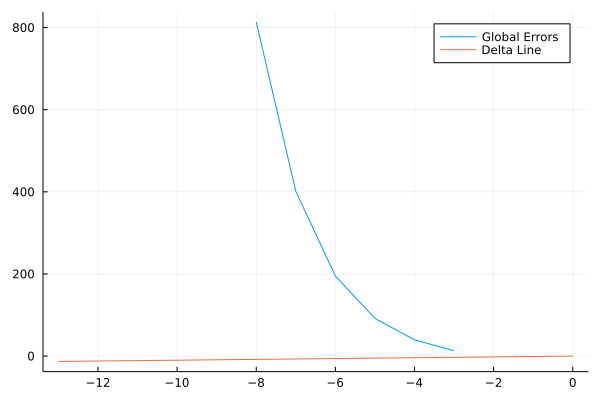

In [27]:
#calculate global discretization error
#Global Errors
global_errors = log2.((Y - Z)) #TODO: Fix

plot(log2.(deltas)
    ,[global_errors,log2.(deltas)]
    ,labels = ["Global Errors" "Delta Line"]
)

## PC-Exercise 8.1.3
Repeat PC-Exercise 8.1.2 using Heun's method. Compare results with eulers method.

In [7]:
#find the list of estimates.
X = zeros(14)
Y = zeros(14)
Z = zeros(14)
global_errors = zeros(14)
x = []


for (i,base) in enumerate(bases)

    #Calculate method
    x,y,z = heuns_method_with_local_errors(base, 1.0, 0.0, 1.0)
    
    #Get final results
    X[i] = last(x) # final Local Error
    Y[i] = last(y) # Actual Function end results
    Z[i] = last(z) # Estimated Function end bits 
    
   
    
end

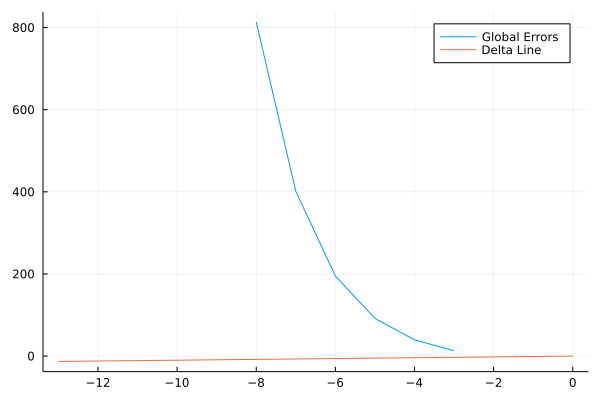

In [28]:
#Global Errors
global_errors = log2.((Y - Z)) #TODO: Fix

plot(log2.(deltas)
    ,[global_errors,log2.(deltas)]
    ,labels = ["Global Errors" "Delta Line"]
)

## PC-Exercise 8.1.5
Repeat PC-Exercise 8.1.3 using the 3-step Adams-Bashford Method with the Heun method as its starting routine.

In [25]:
#find the list of estimates.
X = zeros(14)
Y = zeros(14)
Z = zeros(14)
global_errors = zeros(14)
x = []


for (i,base) in enumerate(bases)
    if i < 4
        continue
    end

    #Calculate method
    x,y,z = ab_method_with_local_errors(base, 1.0, 0.0, 1.0)
    
    #Get final results
    X[i] = last(x) # final Local Error
    Y[i] = last(y) # Actual Function end results
    Z[i] = last(z) # Estimated Function end bits 
    
   
    
end

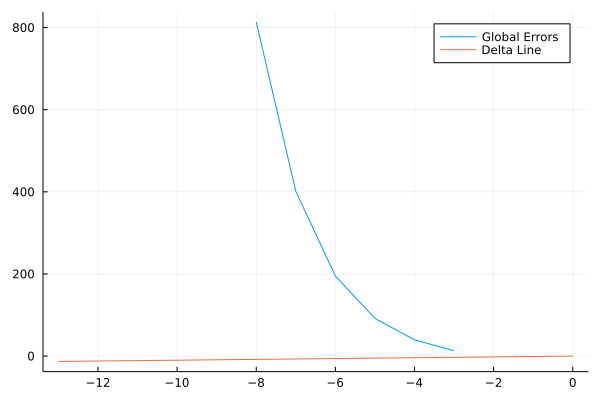

In [29]:
#Global Errors
global_errors = log2.((Y - Z)) #TODO: Fix

plot(log2.(deltas)
    ,[global_errors,log2.(deltas)]
    ,labels = ["Global Errors" "Delta Line"]
)

## PC-Exercise 8.1.7
Compare the error of the Euler and Richardson/Romberg extrapolation approximations of X(1) for the solution of the initial value problem
$$
\frac{\partial x}{\partial t} = -x, x(0)=1
$$
for equal time steps $\Delta = 2^{-3}, \dots, 2^{-10}$.
Plot $\log_2$ of the errors against $\log_2 \Delta$.

In [39]:
#Values of the exact solution
f8_1_7(t) = exp(-t);
a8_1_7(x) = -x;

exact_solutions = [f8_1_7.(0:(2.0^(-n)):1) for n=3:10];

In [ ]:
#Values of the Euler solution
#Calculate running Current global error


In [ ]:
#values of the Richardson extrapolation
#Calculate running Global error

In [ ]:
#plot the errors

## PC-Exercise 8.2.1
Use the 2nd Order truncated taylor method with equal length time steps $\Delta = 2^{-3}, \dots, 2^{-10}$
to calculate approximations to the solution:
$$
    x(t)
$$
of the initial value problem
$$
$$
over the interval $0\leq t \leq 0.5$
Repeat the calculations using the 3rd order truncated taylor method.
Plot $\log_2$ of the global discretiation errors against $\log_2 \Delta$.

## PC-Exercise 8.2.2
Repeat PC-Exercise 8.2.1 using the 4th order Runge-Kutta method with equal length time steps $\Delta = 2^{-3}, \dots, 2^{-7}$

## PC-Exercise 8.2.3

## PC-Exercise 8.4.1
Calculate 300 iterates of
$$
$$
with initial value $y_0 = 0.1$ using the prescribed arithematic of the PC, 
at each step rounding the value of $Y_{n+1}$ to the first 4 significant figures.
Plot the relative frequencies of the roundoff errors in a histogram on 
using 40 equal bins.

In [11]:
function iter8_4_2(yn::Float64)
    return π/3 * yn
end

iter8_4_2 (generic function with 1 method)

In [12]:
y = 0.1
N8_4_1 = 300
rounding_errors = zeros(N8_4_1)

for i in 2:N8_4_1
    yi = iter8_4_2(y)
    rounding_errors[i] = yi - round(yi, digits=4)
    y = yi
end

In [13]:
mean(rounding_errors),std(rounding_errors)#,max(rounding_errors),min(rounding_errors)

(1.3419618906535906e-6, 2.816802960951247e-5)

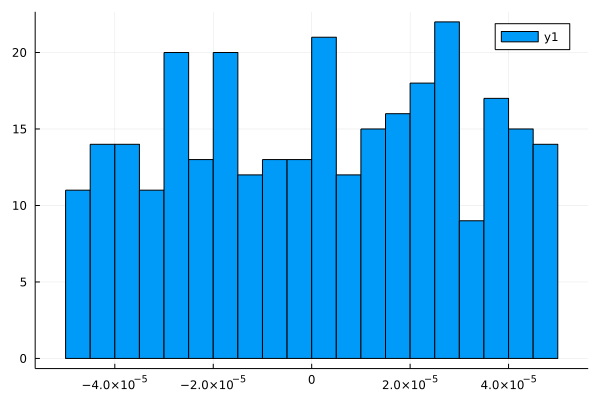

In [14]:
histogram(rounding_errors,bins=40)

## PC-Exercise 8.4.2
Use the Euler method with equal length time steps $\Delta = 2^{-2}$ for the differential equation 
$$
\partial x = x \partial t
$$
over the interval $0 \leq t \leq 1$ for 1,000 different initial values $x(0) \in [0.4,0.6]$.

Use both the prescribed arithematic and round to 4 decimal places to determine the final 
accumulative roundoff error in each case,
plotting the roundoff error in a histogram with 40 equal subintervals.
In addition, calculate the sample mean and sample variance.

In [15]:
#record the known solution and get the differential version.
f8_4_2(x,t) = exp(x);
f8_4_2′(x,t) = x;

N8_4_2 = 1000

nb8_4_2 = ExtendedNumericalBase(f8_4_2,f8_4_2′,2^-2);
x0 = (2*rand(N8_4_2).+4.0)/10;
R = zeros(N8_4_2);

In [16]:
function record8_4(nb::NumericalBase,x0,N)
    for i in 1:N
        yi = euler_method(nb,x0[i],0.0,1.0)[4]
        R[i] = yi - round(yi, digits=4)
    end
    
    return R,mean(R),std(R)
end

record8_4 (generic function with 1 method)

Mean: -1.2774372565070857e-6
stdev: 2.8630411613095742e-5


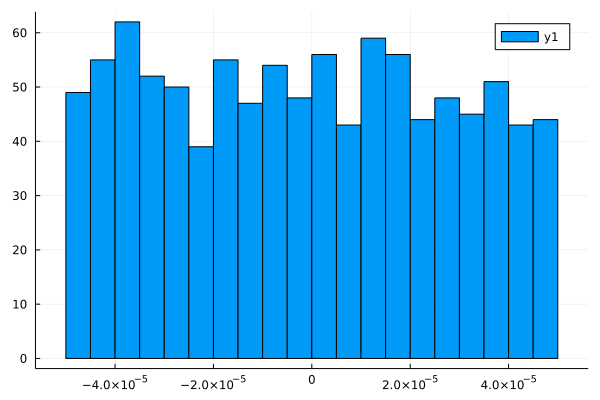

In [17]:
err_x,mean_x,std_x = record8_4(nb8_4_2,x0,N8_4_2)
println("Mean: ",mean_x,"\n","stdev: ", std_x)

histogram(R,bins=40)

## PC-Exercise 8.4.3
Repeat PC-Exercise 8.4.2 with N = 200 and with equal length time steps $\Delta = 2^{-3}, \dots, 2^{-5}$
, determine the roundoff error in each case. plot the 90% confidence intervales for the mean value of the error against $\Delta$.

In [18]:
nb8_4_3_a = FundamentalNumericalBase(f8_4_2,2^-3);
nb8_4_3_b = FundamentalNumericalBase(f8_4_2,2^-4);
nb8_4_3_c = FundamentalNumericalBase(f8_4_2,2^-5);

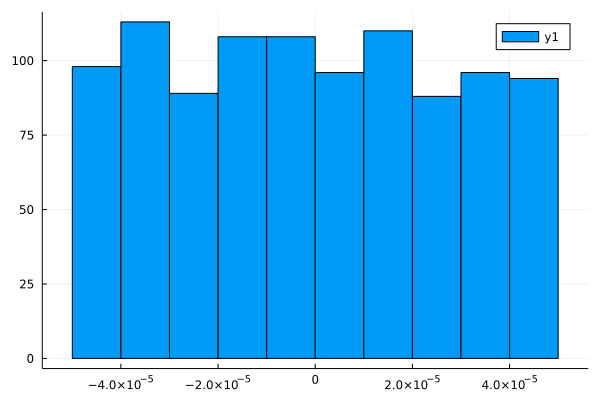

In [19]:
err_a,mean_a,std_a = record8_4(nb8_4_3_a,x0,200);
histogram(err_a)

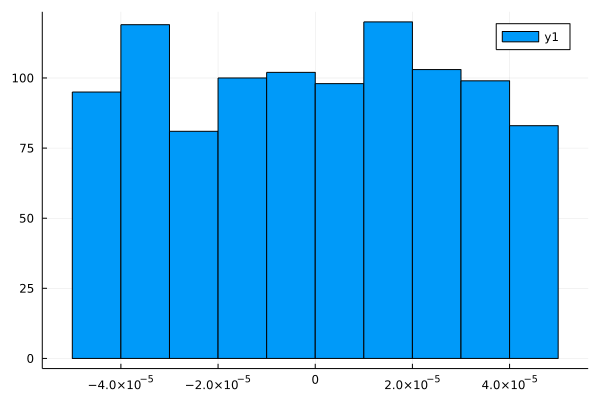

In [20]:
err_b,mean_b,std_b = record8_4(nb8_4_3_b,x0,200);
histogram(err_b)

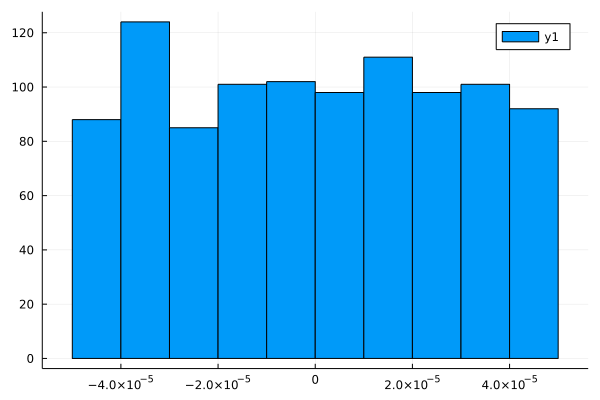

In [21]:
err_c,mean_c,std_c = record8_4(nb8_4_3_c,x0,200);
histogram(err_c)

In [22]:
v = [-1 1]
#90% confidence intervals #TODO
bounds_a = 1.65*std_a *v .+ mean_a;
bounds_b = 1.65*std_b *v .+ mean_b;
bounds_c = 1.65*std_c *v .+ mean_c;

In [31]:
println(bounds_a)
println(bounds_b)
println(bounds_c)

[-4.7943831857759554e-5 4.6138384779712024e-5]
[-4.7336313659095254e-5 4.6220168370384524e-5]
[-4.740810768987015e-5 4.6831262818595737e-5]


In [30]:
#Plot: TODO
#plot this as widths maybe?
bounds_a

1×2 Matrix{Float64}:
 -4.79438e-5  4.61384e-5